In [49]:
%matplotlib inline
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import feyn
from sklearn.model_selection import train_test_split
import xgboost as xg 
from sklearn.svm import SVR 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler

In [50]:

df=pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/9-basic-feat/feat-basic.csv')

In [51]:
df.head()

,Unnamed: 0,temp,dew_point_temp,rel_hum,visibility,press,daily_demand,hmdxx,year,month,day_of_week,week_of_year,sun_set
0,0,0.575000,-1.387500,87.000000,17.841667,99.075833,14655.208333,-1.884900,1994,1,5,52,17.0
1,1,-8.704167,-12.445833,74.416667,28.387500,99.920000,15783.333333,-12.827363,1994,1,6,52,17.0
2,2,-12.612500,-15.820833,77.250000,10.404167,100.057083,18992.708333,-17.143932,1994,1,0,1,17.0
3,3,-9.833333,-13.570833,74.416667,24.879167,98.675417,19080.708333,-14.183286,1994,1,1,1,17.0
4,4,-11.866667,-16.154167,70.791667,27.033333,99.352083,19183.208333,-16.407695,1994,1,2,1,17.0


In [52]:
df = df.dropna()

In [53]:
x = df.loc[:, df.columns != 'daily_demand'].values
y = df.loc[:, 'daily_demand'].values

In [54]:
# x_graph = data.iloc[8766:, data.columns != 'hourly_demand'].values
# pred_graph = data.iloc[8766:, 'hourly_demand'].values


rows_to_select = 8766

# Select all columns except 'hourly_demand'
columns_except_hourly_demand = df.columns != 'daily_demand'

# Extract x_graph using iloc and boolean indexing for columns
x_graph = df.iloc[rows_to_select:, columns_except_hourly_demand].values

# Extract pred_graph using iloc and direct indexing for the specific column
pred_graph = df.iloc[rows_to_select:]['daily_demand'].values

In [55]:
print(pred_graph.shape)


(365,)


In [56]:
df.drop(columns='Unnamed: 0', inplace=True)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [58]:
print(x_graph.shape)
print(x.shape)
print(pred_graph.shape)


(365, 12)
(9131, 12)
(365,)


In [59]:
qtrain, qtest = feyn.tools.split(df, ratio=[0.6, 0.4], random_state=42)
qytest = qtest.loc[:, 'daily_demand'].values
qytest

array([19286.5       , 19597.5       , 17777.58333333, ...,
       17969.25      , 15876.79166667, 16649.95833333])

In [60]:
# Instantiate a QLattice
ql = feyn.QLattice(random_seed=42)

# Sample and fit models
qmodels = ql.auto_run(
    data=qtest,
    output_name='daily_demand'
)
best = qmodels[0]

In [61]:
best = qmodels[0]

In [62]:
best.predict(qtest)

array([18542.41447774, 19219.07125364, 17430.50694821, ...,
       19117.05656555, 15978.83404366, 17579.71644099])

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="324.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 891 324.0" width="891" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="215.0" width="711" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="601" y="80.0"><title>daily_demand
linear:
scale=5135.291667
scale offset=0.000000
w=1.508854
bias=1.7428</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="101.5">daily_de..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="89.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="603" y="89.0">out</text><line stroke="#1E1E1E" x1="571" x2="601" y1="97.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="80.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="101.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="89.0">1</text><line stroke="#1E1E1E" x1="451" x2="481" y1="67.5" y2="88.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="127.5" y2="106.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="50.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="71.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="59.0">2</text><line stroke="#1E1E1E" x1="331" x2="361" y1="37.5" y2="67.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="20.0"><title>day_of_week
linear:
scale=0.333333
scale offset=3.003286
w=0.093163
bias=0.6074</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="41.5">day_of_w..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="29.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="110.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="131.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="119.0">4</text><line stroke="#1E1E1E" x1="331" x2="361" y1="97.5" y2="118.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="157.5" y2="136.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="80.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="89.0">5</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="88.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="127.5" y2="106.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="50.0"><title>temp
linear:
scale=0.037060
scale offset=8.955009
w=-1.105175
bias=0.0590</title></rect><text fill="#1E1E1E" font-family="monospace" 
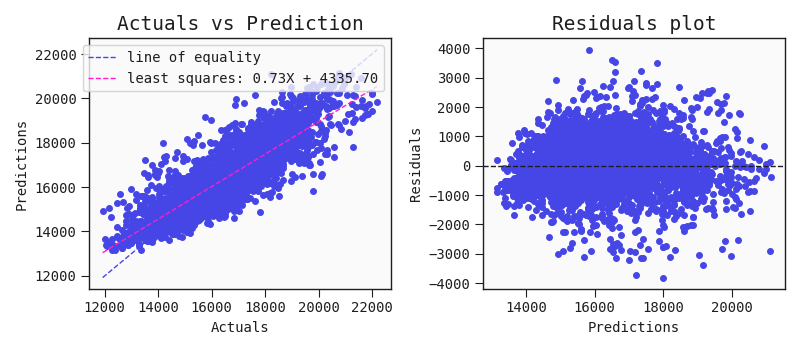

In [63]:
best.plot(qtest)